## Features

There are 13 attributes

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
   -- Value 0: normal
   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
condition: 0 = no disease, 1 = disease

**Getting our tools ready**

In [2]:
#Exploratory Data Analysis tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation tools
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report,plot_roc_curve

In [3]:
df=pd.read_csv("heart-disease.csv")

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


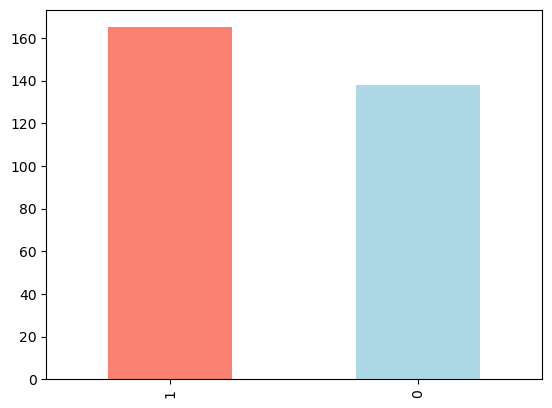

In [6]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
!pip install seaborn

In [9]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


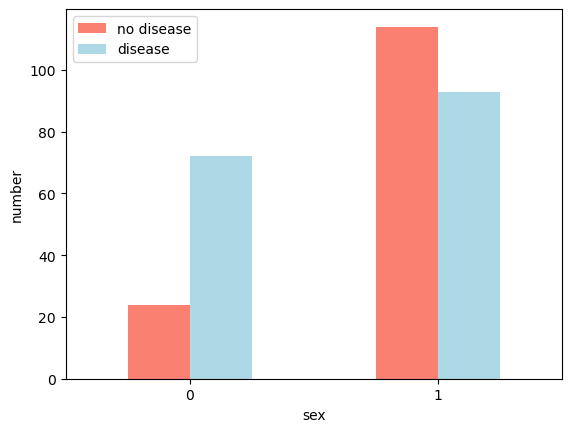

In [10]:
pd.crosstab(df.sex,df.target).plot(kind="bar", color=["salmon","lightblue"])
plt.ylabel("number")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

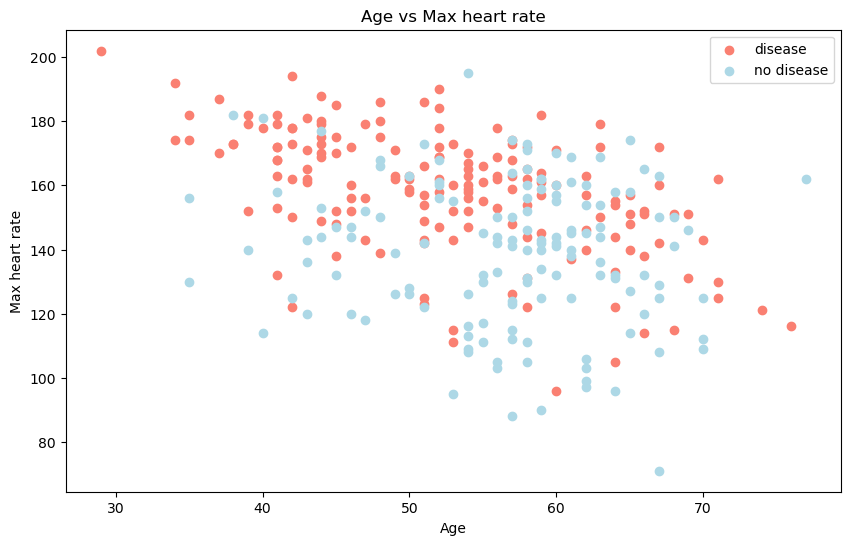

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="salmon")

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="lightblue")

plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["disease","no disease"])
plt.title("Age vs Max heart rate");

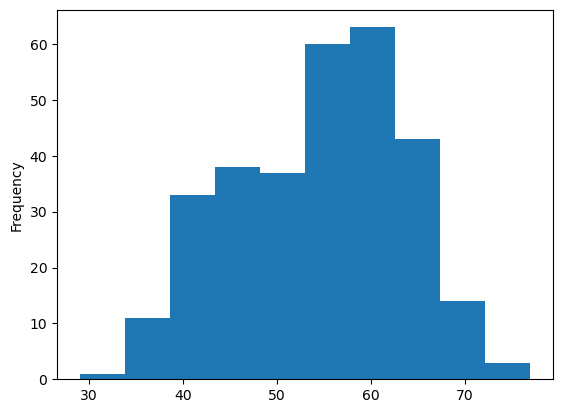

In [12]:
df.age.plot.hist();

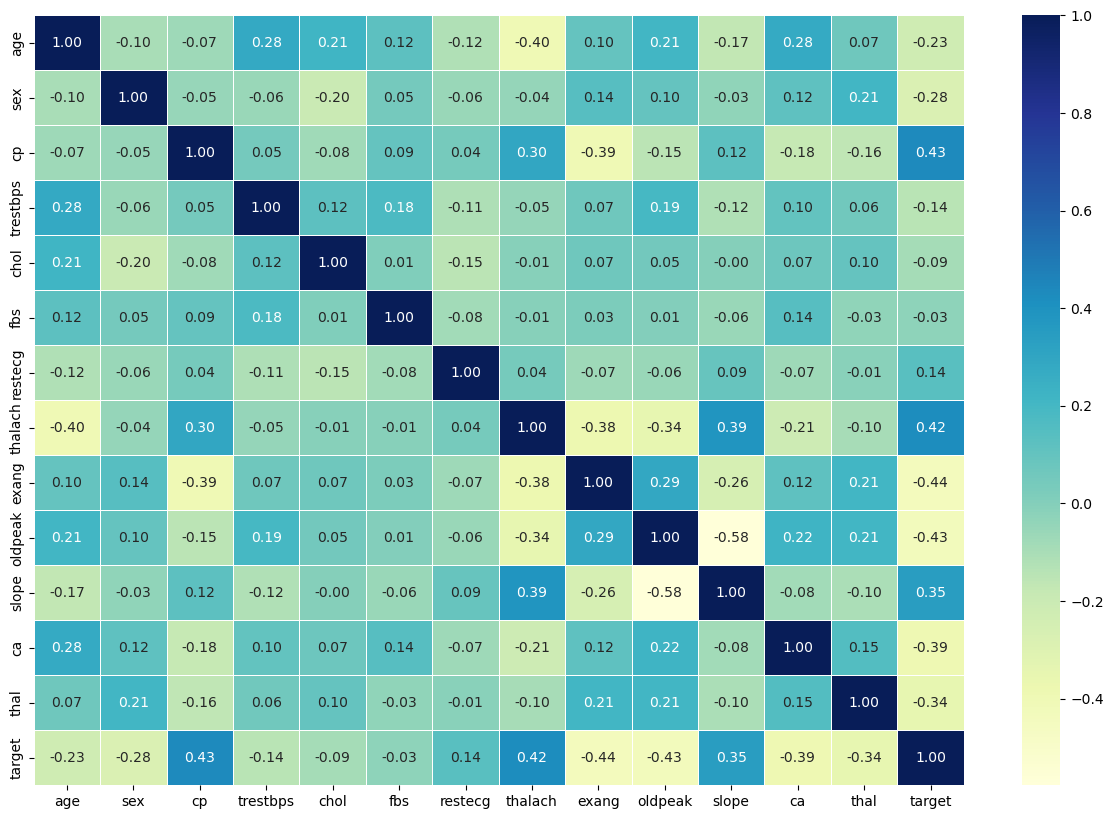

In [13]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt='.2f',cmap="YlGnBu");

In [14]:
X=df.drop("target",axis=1)
y=df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}


In [17]:
def fit_and_score(models,X_train,X_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}
  for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
  return model_scores      
        

In [18]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\MARIYAM\Desktop\ML\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

Maximum test score:77.05%


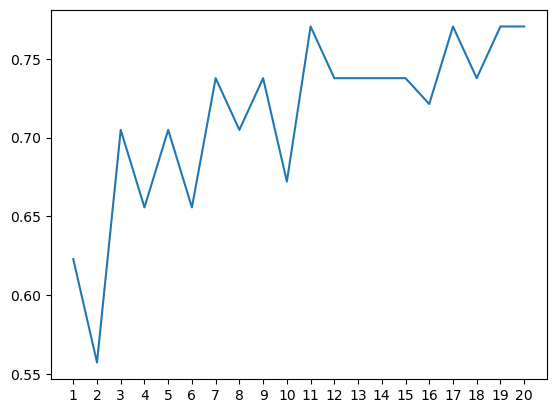

In [27]:
test_scores=[]
neighbors=range(1,21) 
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    test_scores.append(knn.score(X_test,y_test))
    
plt.plot(neighbors,test_scores,label='Test Scores')
plt.xticks(range(1,21,1));
print(f"Maximum test score:{max(test_scores)*100:.2f}%")

In [39]:
log_reg_grid={"c":np.logspace(-4,4,20),
              "solver":["liblinear"]}

rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}


In [32]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)


rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [40]:
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_reg.score(X_test,y_test)

0.8524590163934426

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [60]:
model=LogisticRegression(solver='liblinear',C=5.0)

In [61]:
model.fit(X_train,y_train)

LogisticRegression(C=5.0, solver='liblinear')

In [62]:
model.score(X_test,y_test)

0.8524590163934426

In [63]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [64]:
gs_log_reg.score(X_test, y_test)

0.8524590163934426

In [65]:
y_preds=gs_log_reg.predict(X_test)

C:\Users\MARIYAM\Desktop\ML\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


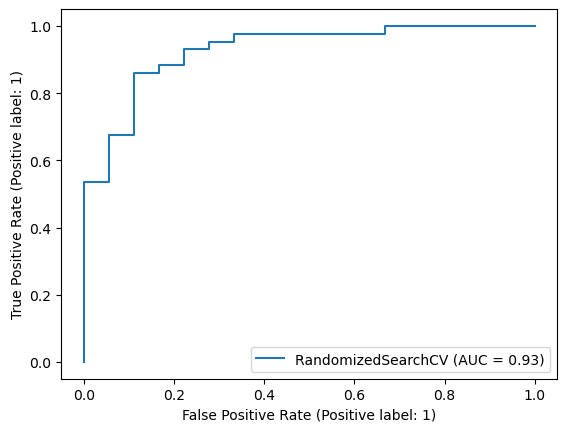

In [68]:
plot_roc_curve(rs_log_reg,X_test,y_test);

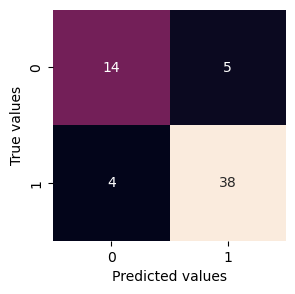

In [69]:
def plot_confusion_matrix(y_preds,y_test):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_preds,y_test),annot=True,cbar=False)
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    
plot_confusion_matrix(y_preds,y_test);

In [70]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [71]:
clf=LogisticRegression(C= 0.615848211066026,solver='liblinear')
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8249180327868852

In [72]:
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8122549019607843

In [73]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.890909090909091

In [74]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8481221874318333

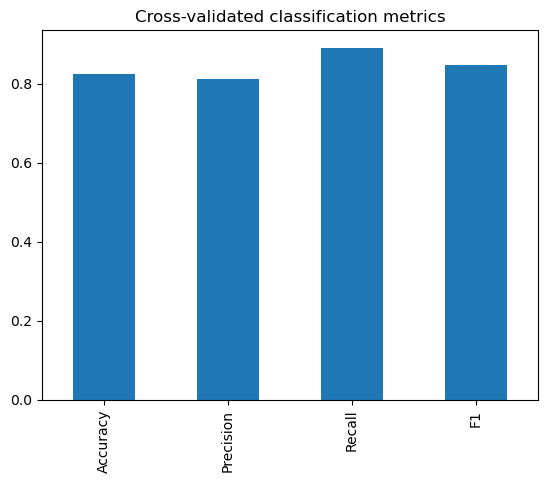

In [75]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [76]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [78]:
clf.coef_

array([[ 0.0081807 , -1.3902742 ,  0.78848173, -0.00854044, -0.0060582 ,
        -0.04410845,  0.40025411,  0.02980833, -0.64797765, -0.56476753,
         0.53529901, -0.7074541 , -0.83059057]])

In [83]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.008180698654346955,
 'sex': -1.3902741959807343,
 'cp': 0.7884817337915436,
 'trestbps': -0.008540438684146869,
 'chol': -0.00605819964029947,
 'fbs': -0.044108449552732715,
 'restecg': 0.40025410530331157,
 'thalach': 0.029808333619683592,
 'exang': -0.6479776474688893,
 'oldpeak': -0.5647675305977953,
 'slope': 0.5352990146465025,
 'ca': -0.7074540980385045,
 'thal': -0.8305905741659662}

In [85]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.008181,-1.390274,0.788482,-0.00854,-0.006058,-0.044108,0.400254,0.029808,-0.647978,-0.564768,0.535299,-0.707454,-0.830591


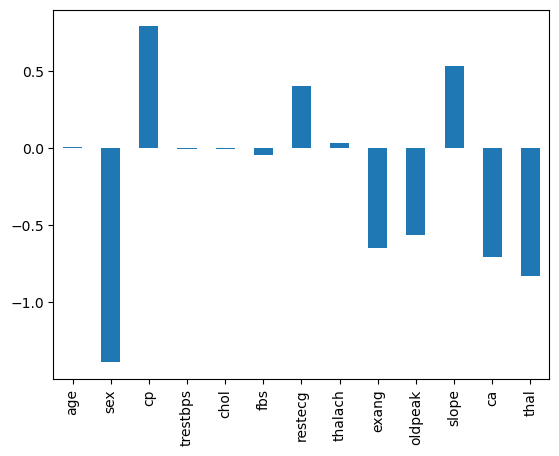

In [91]:

feature_df.T.plot.bar(legend=False);